# 6) Expectation maximization

In [ ]:
from sklearn import mixture
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data

gmm = mixture.GaussianMixture(n_components=3, random_state=42)

gmm.fit(X)

cluster_labels = gmm.predict(X)

iris_with_labels = np.column_stack((X, cluster_labels))

print("Predicted Cluster Labels:")
print(cluster_labels)
print("\nDataset with Cluster Labels:")
print(iris_with_labels)


Predicted Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Dataset with Cluster Labels:
[[5.1 3.5 1.4 0.2 1. ]
 [4.9 3.  1.4 0.2 1. ]
 [4.7 3.2 1.3 0.2 1. ]
 [4.6 3.1 1.5 0.2 1. ]
 [5.  3.6 1.4 0.2 1. ]
 [5.4 3.9 1.7 0.4 1. ]
 [4.6 3.4 1.4 0.3 1. ]
 [5.  3.4 1.5 0.2 1. ]
 [4.4 2.9 1.4 0.2 1. ]
 [4.9 3.1 1.5 0.1 1. ]
 [5.4 3.7 1.5 0.2 1. ]
 [4.8 3.4 1.6 0.2 1. ]
 [4.8 3.  1.4 0.1 1. ]
 [4.3 3.  1.1 0.1 1. ]
 [5.8 4.  1.2 0.2 1. ]
 [5.7 4.4 1.5 0.4 1. ]
 [5.4 3.9 1.3 0.4 1. ]
 [5.1 3.5 1.4 0.3 1. ]
 [5.7 3.8 1.7 0.3 1. ]
 [5.1 3.8 1.5 0.3 1. ]
 [5.4 3.4 1.7 0.2 1. ]
 [5.1 3.7 1.5 0.4 1. ]
 [4.6 3.6 1.  0.2 1. ]
 [5.1 3.3 1.7 0.5 1. ]
 [4.8 3.4 1.9 0.2 1. ]
 [5.  3.  1.6 0.2 1. ]
 [5.  3.4 1.6 0.4 1. ]
 [5.2 3.5 1.5 0.2

# 7)Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_output)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 8)K Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


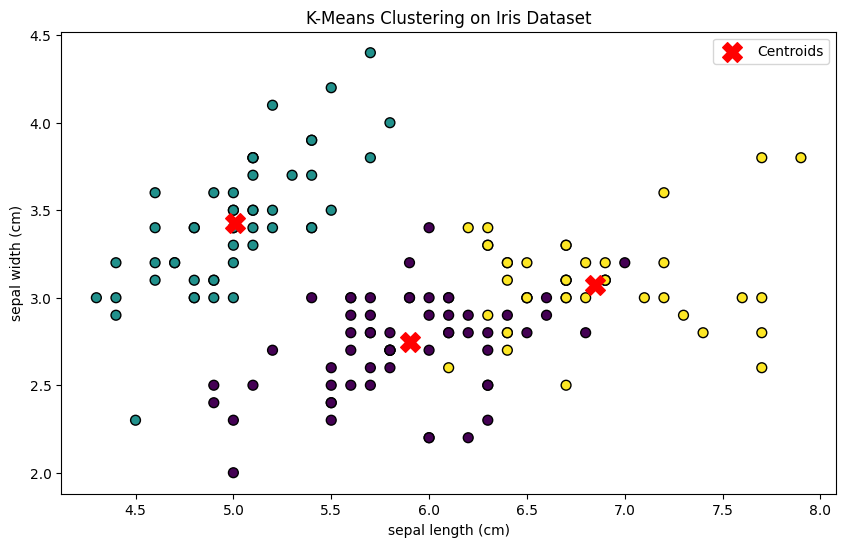

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

cluster_labels = kmeans.labels_

iris_with_labels = np.column_stack((X, cluster_labels))

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


# 9)Apriori

In [ ]:
from itertools import chain, combinations
from collections import defaultdict

# Function to generate candidate itemsets
def generate_candidates(itemset, length):
    candidates = set()
    for item1 in itemset:
        for item2 in itemset:
            union_set = item1.union(item2)
            if len(union_set) == length:
                candidates.add(union_set)
    return candidates

# Function to prune infrequent itemsets
def prune_itemsets(itemsets, min_support, transactions):
    frequent_itemsets = {}
    item_count = defaultdict(int)

    for transaction in transactions:
        for itemset in itemsets:
            if itemset.issubset(transaction):
                item_count[itemset] += 1

    for itemset, count in item_count.items():
        support = count / len(transactions)
        if support >= min_support:
            frequent_itemsets[itemset] = support

    return frequent_itemsets

def apriori_algorithm(transactions, min_support):
    itemsets = [frozenset([item]) for item in set(chain(*transactions))]
    frequent_itemsets = {}

    k = 2
    while itemsets:
        candidates = generate_candidates(itemsets, k)
        frequent_candidates = prune_itemsets(candidates, min_support, transactions)
        frequent_itemsets.update(frequent_candidates)
        itemsets = list(frequent_candidates.keys())
        k += 1

    return frequent_itemsets

def generate_association_rules(frequent_itemsets, min_confidence, transactions):
    association_rules = []

    for itemset in frequent_itemsets.keys():
        if len(itemset) >= 2:
            for subset in chain.from_iterable(combinations(itemset, r) for r in range(1, len(itemset))):
                antecedent = frozenset(subset)
                consequent = itemset - antecedent

                support_itemset = frequent_itemsets[itemset]
                support_antecedent = frequent_itemsets[antecedent] if antecedent in frequent_itemsets else 0

                confidence = support_itemset / support_antecedent if support_antecedent > 0 else 0

                if confidence >= min_confidence:
                    association_rules.append((antecedent, consequent, support_itemset, confidence))

    return association_rules

transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter', 'jelly'],
    ['milk', 'coffee'],
    ['bread', 'milk', 'butter'],
    ['eggs', 'coffee']
]

min_support = 0.4
min_confidence = 0.7

frequent_itemsets = apriori_algorithm(transactions, min_support)
association_rules = generate_association_rules(frequent_itemsets, min_confidence, transactions)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
for rule in association_rules:
    antecedent, consequent, support, confidence = rule
    print(f"{antecedent} => {consequent} (Support: {support}, Confidence: {confidence})")


Frequent Itemsets:
{frozenset({'milk', 'bread'}): 0.4, frozenset({'bread', 'butter'}): 0.4}

Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pycfg.pycfg import PyCFG, CFGNode, slurp
import argparse
import tkinter as tk
from PIL import ImageTk, Image

if __name__ == '__main__':
	parser = argparse.ArgumentParser()

	parser.add_argument('pythonfile', help ='The python file to be analyzed')
	args = parser.parse_args()
	arcs = []

	cfg = PyCFG()
	cfg.gen_cfg(slurp(args.pythonfile).strip())
	g = CFGNode.to_graph(arcs)
	g.draw(args.pythonfile + '.png', prog ='dot')

	# Draw using tkinter.
	root = tk.Tk()
	root.title("Control Flow Graph")
	img1 = Image.open(str(args.pythonfile) + ".png") # PIL solution
	img1 = img1.resize((800, 600), Image.ANTIALIAS)
	img = ImageTk.PhotoImage(img1)

	background ="gray"

	panel = tk.Label(root, height = 600, image = img)
	panel.pack(side = "top", fill ="both", expand = "yes")
	nodes = g.number_of_nodes()	 # no. of nodes.
	edges = g.number_of_edges()	 # no. of Edges.
	complexity = edges - nodes + 2		 # Cyclomatic complexity

	frame = tk.Frame(root, bg = background)
	frame.pack(side ="bottom", fill ="both", expand = "yes")

	tk.Label(frame, text ="Nodes\t\t"+str(nodes), bg = background).pack()
	tk.Label(frame, text ="Edges\t\t"+str(edges), bg = background).pack()
	tk.Label(frame, text ="Cyclo Complexity\t"+
			str(complexity), bg = background).pack()

	root.mainloop()
